# Klasyfikator Ranfom Forest do klasyfikacji samogłosek

## klasyfikacja na podstawie częstotliwości podstawowej f0 i czterech formantów f1, f2, f3 i f4, spc1, spc2, spc3 i entrspc - z zastosowaniem selekcji cech

Import niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Wczytanie zbioru danych

In [2]:
# Wczytanie zbioru danych
dane = pd.read_csv('data.csv')
dane

,Unnamed: 0,vowel,sex,f0,form1,form2,form3,form4,spc1,spc2,spc3,entrspc
0,0,a,1,204.081633,315.948937,1263.413590,1276.537740,2647.008730,0.000000,0.043574,0.198995,3.815404
1,1,a,1,196.078431,242.712410,805.882072,1374.298616,2839.218112,0.000000,0.065699,0.385172,3.099277
2,2,a,1,196.078431,217.568989,1028.162184,1497.574134,2940.119600,0.502954,0.603075,0.785064,2.440471
3,3,a,1,192.307692,231.209209,1085.102842,1496.766417,2867.654232,0.000000,0.029214,0.129859,3.297188
4,4,a,1,192.307692,234.594628,1034.159946,1475.186939,2965.366175,0.000000,0.047300,0.292196,2.898400
...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,y,0,140.845070,303.013981,646.618834,1541.130316,2541.564076,0.398238,0.494138,0.612274,2.700768
116,116,y,0,140.845070,287.549398,672.236633,1529.768064,2524.670542,0.263748,0.329809,0.655430,2.638560
117,117,y,0,138.888889,0.000000,0.000000,265.970918,1502.048156,0.679109,0.757114,1.000000,2.239823
118,118,y,0,138.888889,235.339449,525.554358,1440.605228,2544.053450,0.537042,0.622504,0.970082,3.109960


Posortowanie zbioru danych według samogłosek. Mamy po 20 próbek dla każdej z 6 samogłosek.

In [3]:
dane = dane.sort_values('vowel')
dane

,Unnamed: 0,vowel,sex,f0,form1,form2,form3,form4,spc1,spc2,spc3,entrspc
0,0,a,1,204.081633,315.948937,1263.413590,1276.537740,2647.008730,0.000000,0.043574,0.198995,3.815404
64,64,a,0,158.730159,0.000000,0.000000,625.723402,1252.624817,0.000000,0.124924,0.603017,2.787090
65,65,a,0,147.058824,0.000000,0.000000,585.885056,1224.867304,0.000000,0.230040,0.464162,3.804804
66,66,a,0,147.058824,57.147870,547.790667,1226.394104,2741.215155,0.325853,0.356340,0.488478,3.812406
67,67,a,0,142.857143,250.250064,896.375921,1150.711714,2714.955427,0.356370,0.628263,1.000000,3.688920
...,...,...,...,...,...,...,...,...,...,...,...,...
52,52,y,1,188.679245,277.199163,486.697745,2137.913104,2959.066737,0.023442,0.043694,0.148104,2.406425
51,51,y,1,188.679245,301.555272,450.490850,2115.201333,2966.392632,0.173376,0.116756,0.082141,2.464107
50,50,y,1,204.081633,0.000000,382.441336,1434.444630,2183.091206,0.303255,0.241388,0.154546,2.341790
118,118,y,0,138.888889,235.339449,525.554358,1440.605228,2544.053450,0.537042,0.622504,0.970082,3.109960


Enkodowanie klas dla 6 samogłosek a, e, i, o, u, y

In [4]:
X_dane = dane.iloc[:, 3:]
X = np.array(X_dane)
# Klasa plec
y_dane = dane.iloc[:,[1]]
y = list(np.array(y_dane).reshape(-1,))

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

Selekcja cech. Zastosowano metodę Tree-based feature selection, która umożliwia wyznaczenie istotności cech i dobór najistotniejszych, zmniejszając tym samym wymiarowość zbioru cech

In [5]:
#X = SelectKBest(chi2, k=2).fit_transform(X, y)

# L1-based feature selection
#clfs = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y) #l1

# Tree-based feature selection
clfs = ExtraTreesClassifier(n_estimators=50) #tree
clfs = clfs.fit(X, y) #tree

model = SelectFromModel(clfs, prefit=True)
X = model.transform(X)
print(X.shape)

# istotnosc cech
print(clfs.feature_importances_)
dataframe_istotnosc = pd.DataFrame()
dataframe_istotnosc['Cecha'] = ['f0', 'f1', 'f2', 'f3', 'f4', 'spc1', 'spc2', 'spc3', 'entrspc']
dataframe_istotnosc['Istotnosc'] = list(clfs.feature_importances_)
print('Istotność cech:')
print(dataframe_istotnosc)

(120, 4)
[0.07563631 0.05050843 0.14367751 0.21144393 0.1269387  0.09982559
 0.0662488  0.06809042 0.15763031]
Istotność cech:
     Cecha  Istotnosc
0       f0   0.075636
1       f1   0.050508
2       f2   0.143678
3       f3   0.211444
4       f4   0.126939
5     spc1   0.099826
6     spc2   0.066249
7     spc3   0.068090
8  entrspc   0.157630


Wybrane zostały cztery cechy o najwyższej istotności, czyli formanty f2, f3 i f4, oraz entrspc. Cechy f0, f1, spc1, spc2 i spc3 zostały odrzucone z powodu zbyt niskiej istotności.

Podział na zbiór uczący i testowy w ten sposób, żeby każda samogłoska występowała w nich w takiej samej liczbie (sprawiedliwy podział). W zbiorze uczącym po 15 próbek dla każdej samogłoski, a w testowym po 5. Jest to podział taki, że zbiór testowy stanowi 25 % zbioru uczącego.

In [6]:
#Podzial na zbior uczacy i testowy
#X_train, X_test, y_train_enc, y_test_enc = train_test_split(
#    X, y, test_size=0.30, random_state=42)
idx = np.arange(0, len(X))
ind_train = np.where(((idx + 1) % 4) != 0)
ind_test = np.where(((idx + 1) % 4) == 0)
X_train = X[ind_train]
y_train_enc = y[ind_train]
X_test = X[ind_test]
y_test_enc = y[ind_test]

Uczenie i predykcja, wyznaczenie dokładności predykcji.

In [7]:
# Utworzenie modelu klasyfikatora
clf = RandomForestClassifier(min_samples_split=4)

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train_enc)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test_enc, y_pred))

Accuracy: 0.9333


Odkodowanie klas w zbiorze uczącym i testowym, wyświetlenie macierzy konfuzji i raportu klasyfikacji

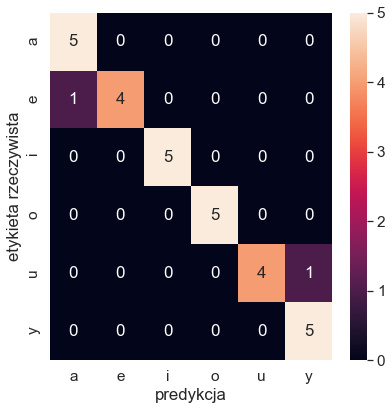

In [8]:
y_test = le.inverse_transform(y_test_enc)
y_pred = le.inverse_transform(y_pred)

# Macierz konfuzji
sns.set(font_scale=1.4)
plt.figure(figsize = (6, 6))
data = {'etykieta rzeczywista': y_test, 'predykcja': y_pred}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True)
plt.tight_layout()
plt.show()

In [9]:
# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))

# Raport klasyfikacji
print('Raport klasyfikacji')
print(classification_report(y_test, y_pred))

Macierz konfuzji:
[[5 0 0 0 0 0]
 [1 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 1]
 [0 0 0 0 0 5]]
Raport klasyfikacji
              precision    recall  f1-score   support

           a       0.83      1.00      0.91         5
           e       1.00      0.80      0.89         5
           i       1.00      1.00      1.00         5
           o       1.00      1.00      1.00         5
           u       1.00      0.80      0.89         5
           y       0.83      1.00      0.91         5

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Wnioski
Dokładność predykcji wyniosła 93.33 %. Jak na klasyfikację wieloklasową z uwzględnieniem 6 klas dokładność może zostać uznana za wysoką. Samogłoski o największej liczbie prawidłowych rozpoznań to 'a', 'i', 'u', 'y'. Wszystkie ich rozpoznania były prawidłowe. Najmniejszą skuteczność zaobserwowano w przypadku rozpoznawania samogłoski 'e' i 'o' (trzy prawidłowe rozpoznania na pięć).

## Przydatne linki
Selekcja cech:
https://scikit-learn.org/stable/modules/feature_selection.html
Kodowanie cech:
https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
https://scikit-learn.org/stable/modules/preprocessing_targets.html